# Group Project: Identifying Gender from Voice Features

### Project Overview:
This project has the intention of analyzing human voice samples in order to create multiple predictive models that can accurately identify the speakers as male or female.

### Voices Collection
We found a data file on Kaggle, which includs 20 features extracted from over 3000 audio samples by using R. All the instances are labeled by human, and the data file is in the format of csv.  However, for the sake of learning and practicing, we decide to experience the whole process of accomplishing machine learning tasks. So instead of using the csv file we found on Kaggle, we collected more than 460 audio files from VoxForge, speech corpus, and used R to generated our own csv file. We also developed a shell script in order to organize all the audio files to make sure all the audio sample are from different speakers. The shell script is also included in this folder for reference. Due to the limitation of female speakers, and the poor quality of some audio tracks, we managed to generated a csv file that includes 20 features of 460 (230 with female speakers, and 230 with male speakers) samples, by using speech processing package provided by R. 


### The Dataset
Our dataset consists of 460 recorded voice samples, collected from male and female speakers. Exactly 50% of of the vectors are labeled female and 50% male. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages. Humans can hear sound waves with frequencies between about 20 Hz and 20 kHz, so we narrow the analyzed frequency range to 0hz-280hz (human vocal range) with a sound threshold of 15%. We take a random 80% samples for training and the rest 20% for test.

Our data consists of 21 attribute vectors consisting of 20 acoustic properties.
The following acoustic properties of each voice:
    1. meanfreq: mean frequency (in kHz)
    2. sd: standard deviation of frequency
    3. median: median frequency (in kHz)
    4. Q25: first quantile (in kHz)
    5. Q75: third quantile (in kHz)
    6. IQR: interquantile range (in kHz)
    7. skew: skewness (see note in specprop description)
    8. kurt: kurtosis (see note in specprop description)
    9. sp.ent: spectral entropy
    10. sfm: spectral flatness
    11. mode: mode frequency
    12. centroid: frequency centroid (see specprop)
    13. meanfun: average of fundamental frequency measured across acoustic signal
    14. minfun: minimum fundamental frequency measured across acoustic signal
    15. maxfun: maximum fundamental frequency measured across acoustic signal
    16. meandom: average of dominant frequency measured across acoustic signal
    17. mindom: minimum of dominant frequency measured across acoustic signal
    18. maxdom: maximum of dominant frequency measured across acoustic signal
    19. dfrange: range of dominant frequency measured across acoustic signal
    20. modindx: modulation index. 
    21. label: male or female
    
We used multiple classifiers and altered hyperparameters to raise our identification rate for this data set.

These files include a bunch of popular methods nowadays:
    1. Neural Network
    2. KNN
    3. Gaussian Naive Bayes
    4. Decision Treee
    5. Random Forest
    6. SVM


This first notebook will focus on understanding and visualizing the data before we proceed to generate various machine learning algorithms.

In [ ]:
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
path = '/Users/Kassi/Desktop/voice-gender/voice.csv'
voice_data = pd.read_csv(path)

In [4]:
voice_data["label"].value_counts()

male      230
female    230
Name: label, dtype: int64

In [5]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 21 columns):
meanfreq    460 non-null float64
sd          460 non-null float64
median      460 non-null float64
Q25         460 non-null float64
Q75         460 non-null float64
IQR         460 non-null float64
skew        460 non-null float64
kurt        460 non-null float64
sp.ent      460 non-null float64
sfm         460 non-null float64
mode        460 non-null float64
centroid    460 non-null float64
meanfun     460 non-null float64
minfun      460 non-null float64
maxfun      460 non-null float64
meandom     460 non-null float64
mindom      460 non-null float64
maxdom      460 non-null float64
dfrange     460 non-null float64
modindx     460 non-null float64
label       460 non-null object
dtypes: float64(20), object(1)
memory usage: 75.5+ KB


In [6]:
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.149829,0.079581,0.153317,0.091079,0.220798,0.129719,1.607258,9.132810,0.974766,0.793329,...,0.149829,0.108765,0.007866,0.166667,0.681641,0.000000,2.585938,2.585938,0.268235,male
1,0.166784,0.071761,0.186667,0.102691,0.221266,0.118575,5.634394,95.039826,0.942253,0.580680,...,0.166784,0.102615,0.020833,0.140351,0.255409,0.000000,0.531250,0.531250,0.323529,male
2,0.132298,0.089022,0.162465,0.035876,0.202270,0.166394,1.791367,7.296771,0.955041,0.678787,...,0.132298,0.144897,0.027875,0.228571,0.144531,0.000000,0.503906,0.503906,0.398794,male
3,0.163763,0.059865,0.147841,0.137713,0.194072,0.056359,3.873660,20.692037,0.900203,0.454411,...,0.163763,0.147396,0.076923,0.190476,0.198893,0.140625,0.324219,0.183594,0.430260,male
4,0.166021,0.064518,0.147158,0.113447,0.232435,0.118988,4.731612,34.344388,0.879635,0.400395,...,0.166021,0.125631,0.056338,0.275862,0.101807,0.000000,0.238281,0.238281,0.124122,male


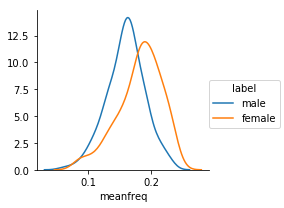

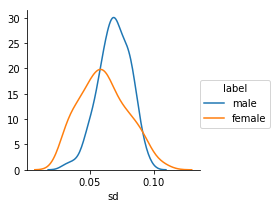

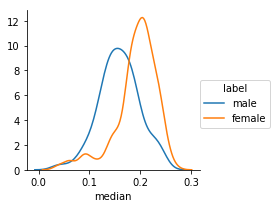

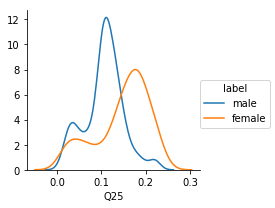

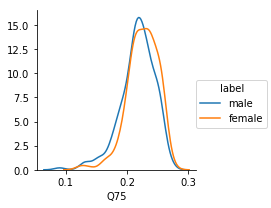

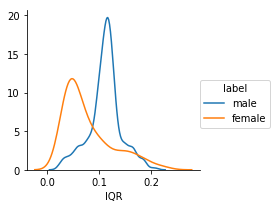

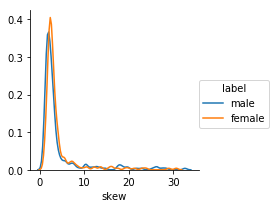

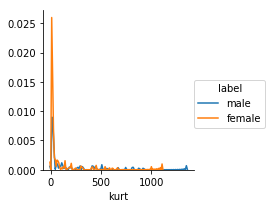

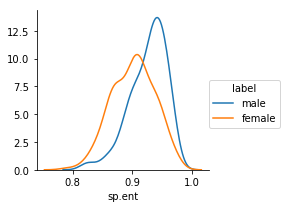

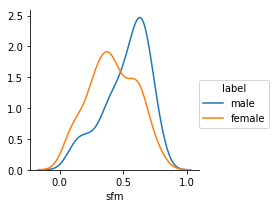

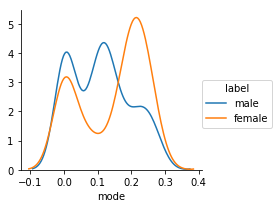

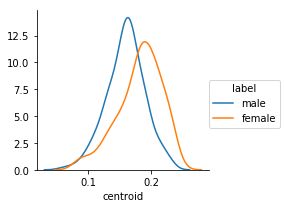

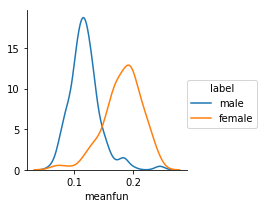

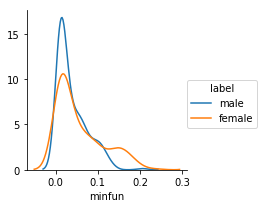

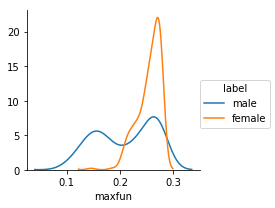

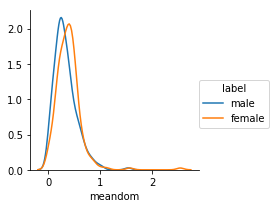

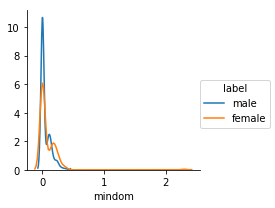

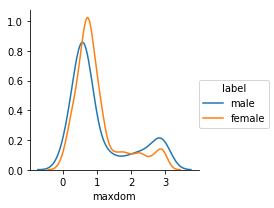

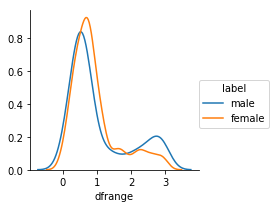

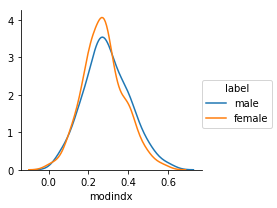

In [7]:
# Part 2: Data Visualization
for col in voice_data.columns[:-1]:
    sns.FacetGrid(voice_data, hue="label", size=3).map(sns.kdeplot, col).add_legend()
    plt.show()

### Our observation: 
At first glance, most significant features are IQR and meanfun. As one would expect, the fundamental frequencies exhibited by male voices are much lower than those exhibited by females and interquantile range exhibited by male voices are much higher than those exhibited by females. 
#### From all 20 features we can separate “meanfun” and “IQR”. 

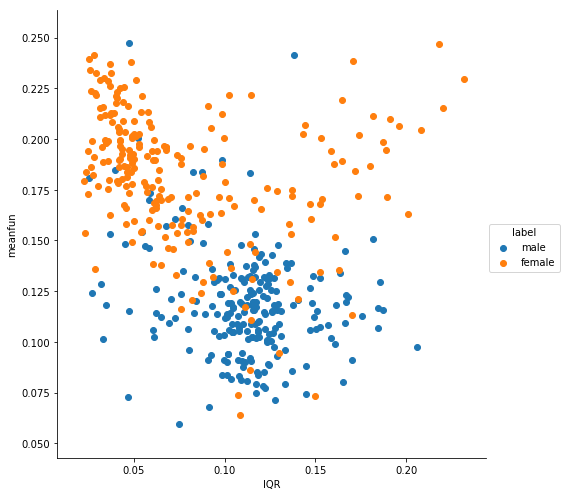

In [10]:
sns.FacetGrid(voice_data, hue="label", size=7).map(plt.scatter, "IQR", "meanfun").add_legend()
plt.show()

As we could see, there are some samples that belong to male but graph tells us that it is female.

### Is it enough of this two features to make predictions? 
With this question, we will train our models with 368 train samples and 92 test samples with all features and with 2 features separately.
